In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('UK_foods.csv',index_col=0)

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**TASK: Run the import line below to read in the data**

In [4]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [5]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<Axes: >

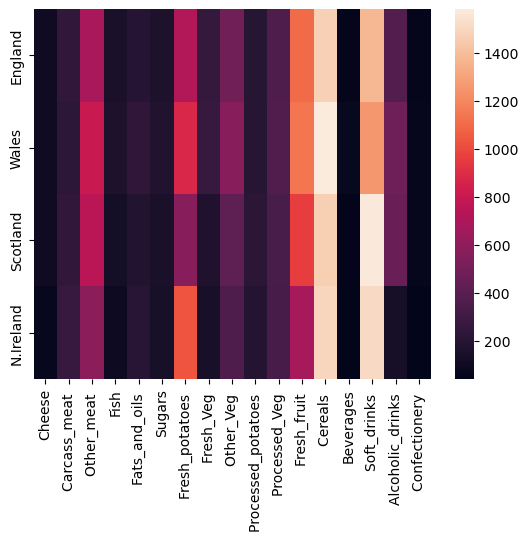

In [8]:
sns.heatmap(df.transpose())

**TASK: Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [40]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [41]:
encoder=Sequential()

In [42]:
encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation='relu',input_shape=[8]))
encoder.add(Dense(2,activation='relu',input_shape=[4]))

In [43]:
decoder=Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))

In [44]:
autoencoder=Sequential([encoder,decoder])

In [45]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler=MinMaxScaler()

In [48]:
df_scale=scaler.fit_transform(df.transpose().values)

In [49]:
df.transpose().values

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]], dtype=int64)

In [50]:
df_scale.shape

(4, 17)

In [51]:
autoencoder.fit(df_scale,df_scale,epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 547ms/step - loss: 0.4168 - accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2823 - accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2375 - accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2183 - accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2083 - accuracy: 0.0000e+00
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2018 - accuracy: 0.0000e+00
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1949 - accuracy: 0.2500
Epoch 8/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1887 - accuracy: 0.2500
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1833 - accuracy: 0.2500
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1788 - accuracy: 0.2500
Epoch 11/15


In [52]:
df_loss=pd.DataFrame(autoencoder.history.history)

<Axes: >

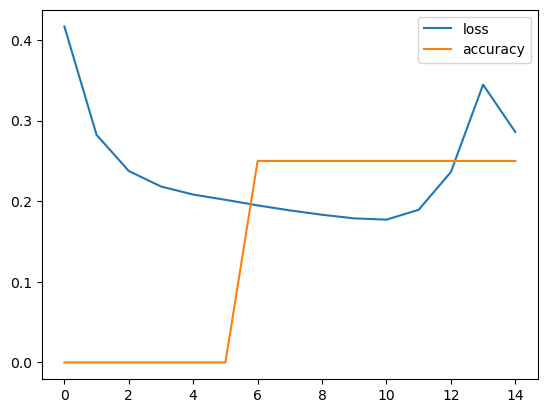

In [53]:
df_loss.plot()

**TASK: Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.**

In [54]:
encoded_2dim=encoder.predict(df_scale)

1/1 [==============================] - 0s 151ms/step


In [55]:
encoded_2dim

array([[0.        , 0.51503104],
       [0.        , 0.10996313],
       [0.        , 0.54404265],
       [0.        , 0.07361079]], dtype=float32)

In [57]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [58]:
results=pd.DataFrame(encoded_2dim,columns=['C1','C2'])

In [59]:
results

,C1,C2
0,0.0,0.515031
1,0.0,0.109963
2,0.0,0.544043
3,0.0,0.073611


In [60]:
results['index']=df.transpose().index

In [61]:
results

,C1,C2,index
0,0.0,0.515031,England
1,0.0,0.109963,Wales
2,0.0,0.544043,Scotland
3,0.0,0.073611,N.Ireland


<Axes: xlabel='C2', ylabel='C1'>

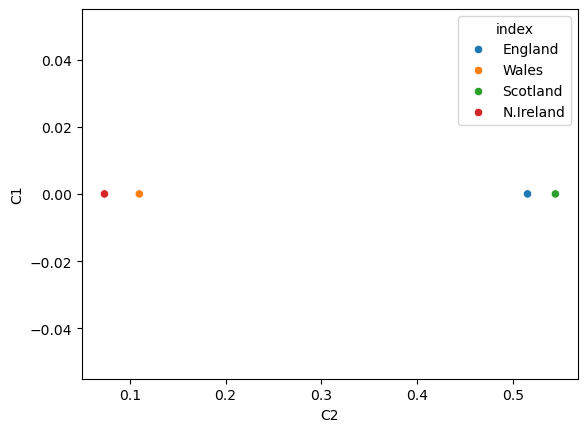

In [64]:
sns.scatterplot(results,x='C2',y='C1',hue='index')

####its group England and scotland in same group as they have similarities